In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Calculate the difference of metrics betweeen parent and child FT

In [4]:
def difference(df):
    metrics = {
        'ϕ_spec': 6,
        'ϕ_npv': 8,
        'ϕ_prec': 5,
        'ϕ_mcc': 15,
        'ϕ_acc': 11,
        'ϕ_s': 1,
        'ϕ_dor': 22
    }
    
    for metric, index in metrics.items():
        df[metric] = df['Metrics'].apply(lambda x: x[index]) - df['Parent Metrics'].apply(lambda x: x[index])

    color_map = {
        'disconnect_be': 'blue',
        'delete_be': 'green',
        'create_gate': 'red',
        'change_gate_type': 'purple',
        'create_be': 'orange',
        'cross_over': 'brown',
        'delete_gate': 'pink',
        'connect_be': 'gray',
        'move_be': 'cyan',
        'do_nothing' : 'black'
    }
    
    for metric in metrics.keys():
        plt.figure(figsize=(8, 8))
        
        for operator in df['Operator'].unique():
            subset = df[df['Operator'] == operator]
            generations = subset['Generation'].unique()
            subset = subset[subset['Passed'] == 1]
            generations.sort()
            
            x = []
            mean = []
            std = []
            median = []
            
            for i in range(len(generations)):
                x.append(generations[i])
                mean.append(subset[subset['Generation'] == generations[i]][metric].mean())
                std.append(subset[subset['Generation'] == generations[i]][metric].std())
                median.append(subset[subset['Generation'] == generations[i]][metric].median())
                    
            plt.plot(x, mean, label=f'{operator}', color=color_map.get(operator, 'black'))
        
        # # Plot std
        # plt.fill_between(x, np.array(mean) - np.array(std), np.array(mean) + np.array(std), 
        #                 color=color_map.get(operator, 'black'), alpha=0.2)
        
        # # Plot median line
        # plt.plot(x, median, label=f'{operator} Median', color=color_map.get(operator, 'black'), linestyle=':')

        plt.xlabel('Generation')
        plt.ylabel(f'Mean of difference between child and parent {metric}')
        plt.title(f'Mean of difference between child and parent {metric} for {operator}')
        plt.legend(title='Operator')
        plt.grid(True)
        plt.show()
        plt.close()

In order to plot the results, we need to run the following code:

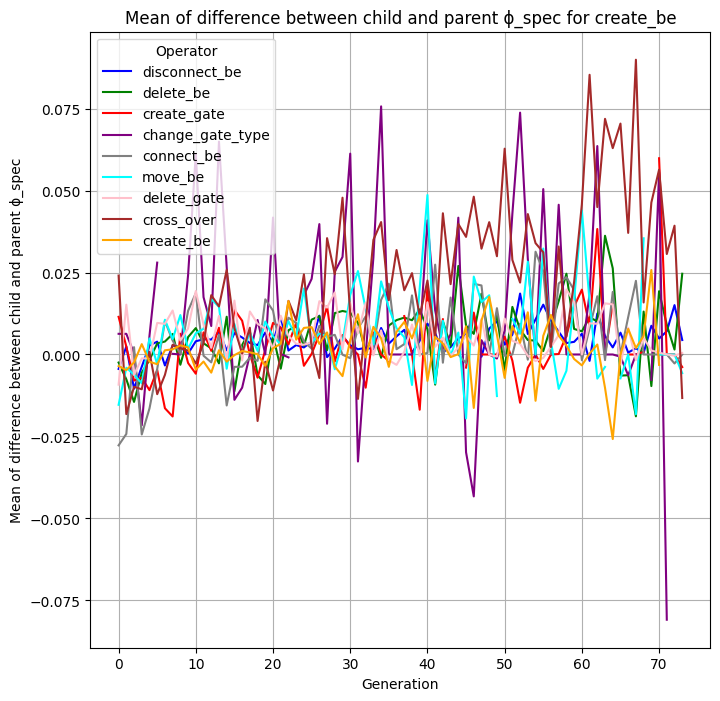

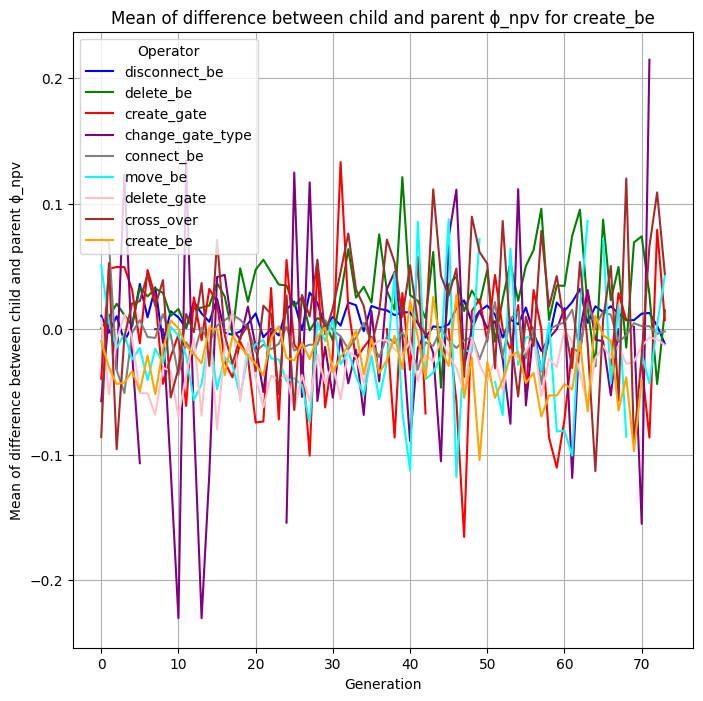

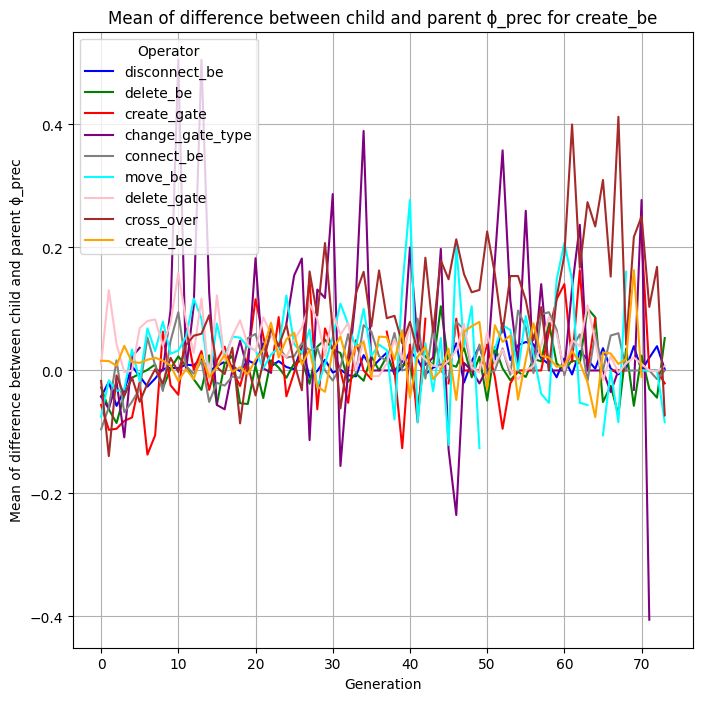

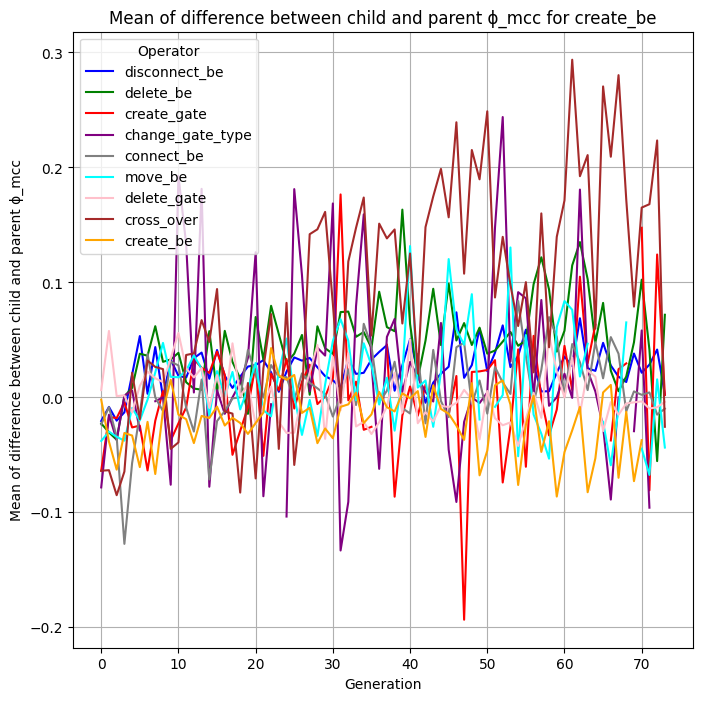

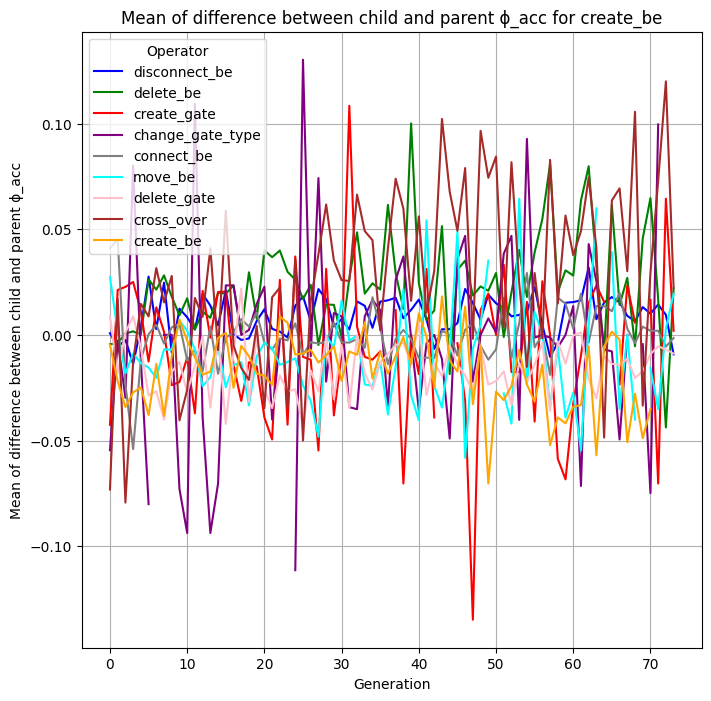

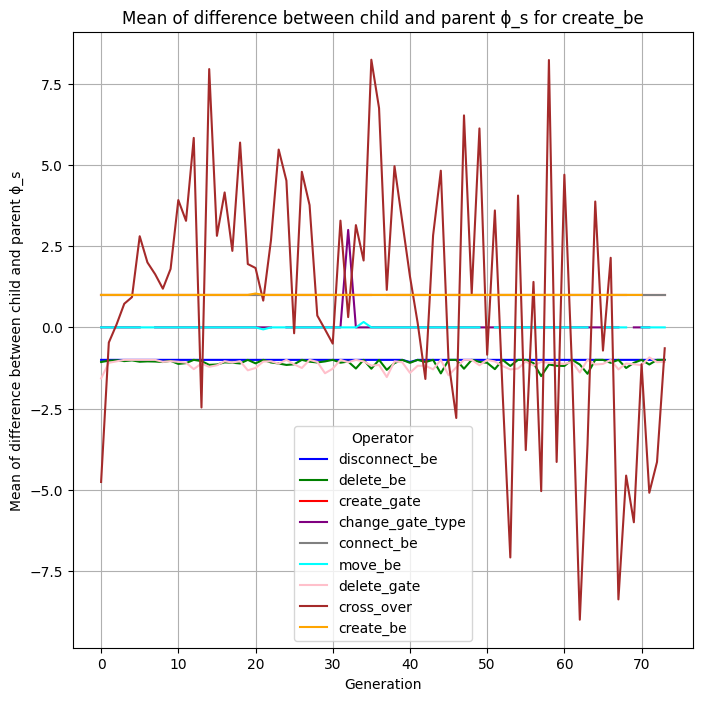

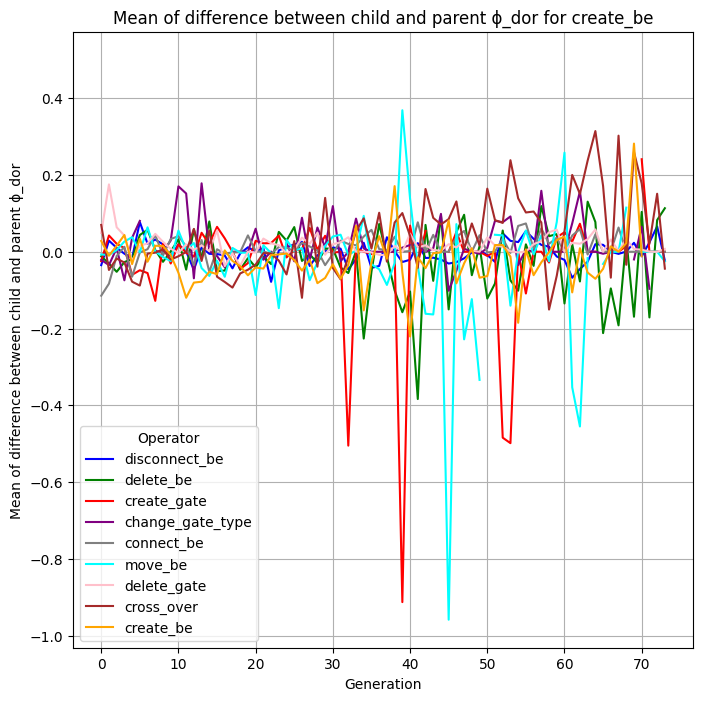

In [5]:

# Write the folder with the dataframes. 
# The dataframes should be in the format of the ones saved by the learn_ft.py script
# The default folder, where the required data frames for this test are saved, is: saved_data_frames/difference
folder_path = '..\\saved_data_frames\\difference\\COVID_19'

file_list = os.listdir(folder_path)
dataframes = []
filename = os.path.basename(os.path.normpath(folder_path))
for file_name in file_list:
    if file_name.endswith('.pkl'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_pickle(file_path)
        dataframes.append(df)
        
difference(dataframes[0])